**Uploading Images**

In [6]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving cat.jpg to cat.jpg
Saving dog.jpg to dog.jpg
User uploaded file "cat.jpg" with length 444808 bytes
User uploaded file "dog.jpg" with length 89440 bytes


In [7]:
%ls

cat.jpg  dog.jpg  sample_data/


In [0]:
import cv2 as cv

cat = cv.imread('cat.jpg', 0) 
dog = cv.imread('dog.jpg', 0)

In [9]:
print('dog shape:',dog.shape, 'cat shape:', cat.shape)

dog shape: (361, 410) cat shape: (361, 410)


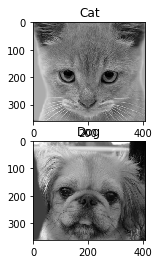

In [10]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(2)
axarr[0].set_title('Cat')
axarr[0].imshow(cat, cmap='gray')
axarr[1].set_title('Dog')
axarr[1].imshow(dog, cmap='gray')

**Hybrid Image**

Text(0.5, 1.0, 'Averaged smoothning')

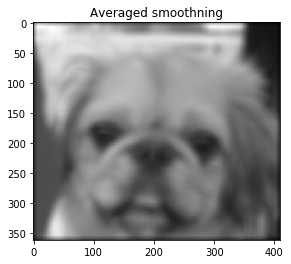

In [12]:
from scipy import signal
import numpy as np

average = np.full((15,15), 1)
average = average/225

dog_smooth = signal.convolve2d(dog, average)
dog_smooth = dog_smooth[7:368,7:417]

imgplot = plt.imshow(dog_smooth, cmap='gray')
plt.title('Averaged smoothning')

In [13]:
dog_smooth.shape

(361, 410)

Text(0.5, 1.0, 'Averaged smoothning')

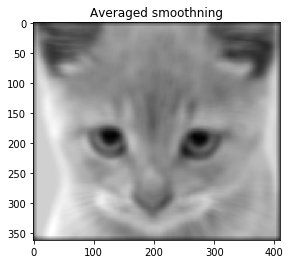

In [14]:
cat_smooth = signal.convolve2d(cat, average)
cat_smooth = cat_smooth[7:368,7:417]

imgplot = plt.imshow(cat_smooth, cmap='gray')
plt.title('Averaged smoothning')

Text(0.5, 1.0, 'Unsharp Masking')

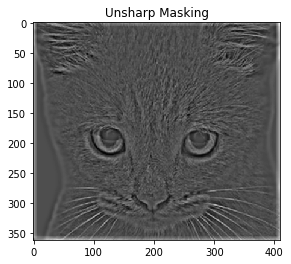

In [15]:
cat_sharp = cat - cat_smooth

imgplot = plt.imshow(cat_sharp, cmap='gray')
plt.title('Unsharp Masking')

Text(0.5, 1.0, 'Hybrid Image')

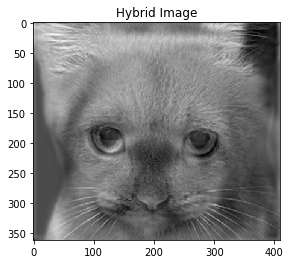

In [16]:
hybrid = cat_sharp + dog_smooth

imgplot = plt.imshow(hybrid, cmap='gray')
plt.title('Hybrid Image')

**Gaussian Filter**

In [0]:
import numpy as np

def Gaussian_Filter(size, sigma, mu):
  x, y = np.meshgrid(np.linspace(-1,1,size), np.linspace(-1,1,size))
  d = np.sqrt(x*x+y*y)
  gauss = np.exp(-((d-mu)**2/(2.0*sigma**2)))
  gauss = gauss/np.sum(gauss)
  return gauss

Text(0.5, 1.0, 'Gauss size=9*9 mu=1')

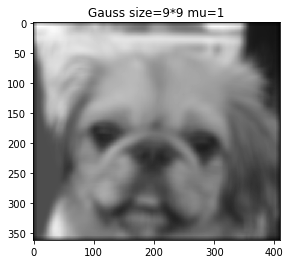

In [18]:
sigma = 1.0
mu = 0.0
size = 9

gauss = Gaussian_Filter(size, sigma, mu)

dog_smooth1 = signal.convolve2d(dog, gauss)
imgplot = plt.imshow(dog_smooth, cmap='gray')
plt.title('Gauss size=9*9 mu=1')

(9, 9)


Text(0.5, 1.0, 'Gauss size=9*9 mu=3')

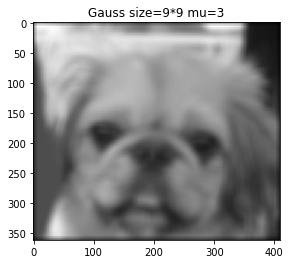

In [19]:
sigma = 5.0
mu = 0.0
size = 9

gauss = Gaussian_Filter(size, sigma, mu)
print(gauss.shape)

dog_smooth2 = signal.convolve2d(dog, gauss)
imgplot = plt.imshow(dog_smooth, cmap='gray')
plt.title('Gauss size=9*9 mu=3')

(15, 15)


Text(0.5, 1.0, 'Gauss size=15*15 mu=5')

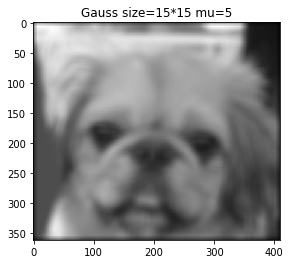

In [20]:
sigma = 5.0
mu = 0.0
size = 15

gauss = Gaussian_Filter(size, sigma, mu)
print(gauss.shape)

dog_smooth3 = signal.convolve2d(dog, gauss)
imgplot = plt.imshow(dog_smooth, cmap='gray')
plt.title('Gauss size=15*15 mu=5')

Text(0.5, 1.0, 'Different Gaussian Parameters')

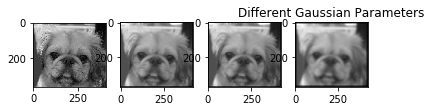

In [21]:
f, axarr = plt.subplots(1,4)
axarr[0].imshow(dog, cmap='gray')
axarr[1].imshow(dog_smooth1, cmap='gray')
axarr[2].imshow(dog_smooth2, cmap='gray')
axarr[3].imshow(dog_smooth3, cmap='gray')
plt.title("Different Gaussian Parameters")

**Pyramids**

In [0]:
def gausspyrmd(img,levels):
    pyrmd = []
    gfil = Gaussian_Filter(5,3.0,0.0)
    for i in range(levels):
        s = img.shape[0]
        pyrmd.append(img)
        img = signal.convolve2d(img,gfil)
        img = cv.resize(img,(int(s/2),int(s/2)))
        img = 255*(img/np.max(img))
    return pyrmd

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as 

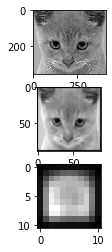

In [25]:
def laplacepyrmd(img,levels):
    gpyrmd = gausspyrmd(img,levels+1)
    pyrmd = []
    for i in range(levels):
        s = gpyrmd[i].shape[0]
        t = gpyrmd[i].shape[1]
        temp = gpyrmd[i] - cv.resize(gpyrmd[i+1],(t,s))
        temp = 255*(temp-np.min(temp))/np.max(temp)
        temp = temp.astype(int)
        pyrmd.append(temp)
    plt.subplot(3,1,1)
    plt.imshow(gpyrmd[0],cmap='gray')
    plt.subplot(3,1,2)
    plt.imshow(gpyrmd[2],cmap='gray')
    plt.subplot(3,1,3)
    plt.imshow(gpyrmd[5],cmap='gray')
    return pyrmd

lplcimg1 = laplacepyrmd(cat,5)

lplcimg2 = laplacepyrmd(cat,5)

**Frequency Domain**

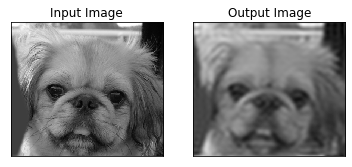

In [76]:
dft = cv.dft(np.float32(dog),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = dog.shape
crow,ccol = int(rows/2) , int(cols/2)

mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-20:crow+20, ccol-20:ccol+20] = 1

fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
dog_smooth = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(dog, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dog_smooth, cmap = 'gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
plt.show()

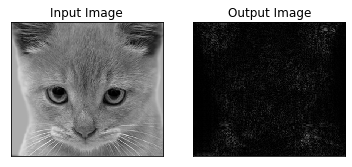

In [78]:
dft = cv.dft(np.float32(cat),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = cat.shape

mask = np.zeros((rows,cols,2),np.uint8)
mask[0:100, 0:cols] = 255
mask[rows-100:rows, 0:cols] = 255
mask[0:rows, 0:100] = 255
mask[0:rows, cols-100:cols] = 255


fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
cat_sharp = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(cat, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cat_sharp, cmap = 'gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
plt.show()

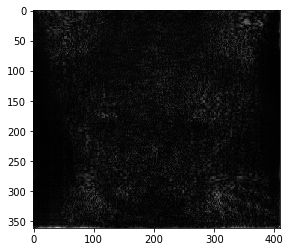

In [88]:
x = dog_smooth + cat_sharp

plt.imshow(x, cmap='gray')